<a href="https://colab.research.google.com/github/dexter11235813/EVA_5/blob/main/assignment_10/assignment_10_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from os.path import join

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git config --global user.email "abgairola@gmail.com"
!git config --global user.user "dexter11235813" 
%cd '/content/drive/My Drive/EVA5/EVA_5/assignment_10'


/content/drive/My Drive/EVA5/EVA_5/assignment_10


In [150]:
# !git pull origin main

In [ ]:
!pip install pytorch-gradcam torch-lr-finder


# MAIN CODE



In [148]:

%cd '/content/drive/My Drive/EVA5/EVA_5/assignment_10'
import importlib
import torch
import torch.nn as nn
import torch.optim as optim
import dataloader
from torchsummary import summary
import config
import model
from torch.optim.lr_scheduler import ReduceLROnPlateau
import show_images_from_batch
import grad_cam
import find_best_lr
importlib.reload(model)
importlib.reload(config)
importlib.reload(dataloader)
importlib.reload(show_images_from_batch)
importlib.reload(grad_cam)
importlib.reload(find_best_lr)

import warnings
warnings.filterwarnings('ignore')

/content/drive/My Drive/EVA5/EVA_5/assignment_10


Files already downloaded and verified
Files already downloaded and verified



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.77E-02


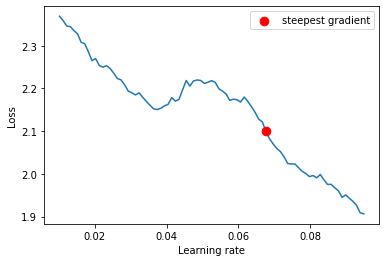

In [93]:
lr_history = find_best_lr.find_best_lr(use_val_loader=False, start_lr=1e-5, end_lr=.1, step_mode='linear', num_iter=100)

In [94]:

net = model.ResNet18().to(config.DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 6.67e-2, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, patience=3, min_lr=1e-4, factor=0.5)
train_loader, test_loader = dataloader.get_iterators()

Files already downloaded and verified
Files already downloaded and verified


In [91]:
summary(net, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

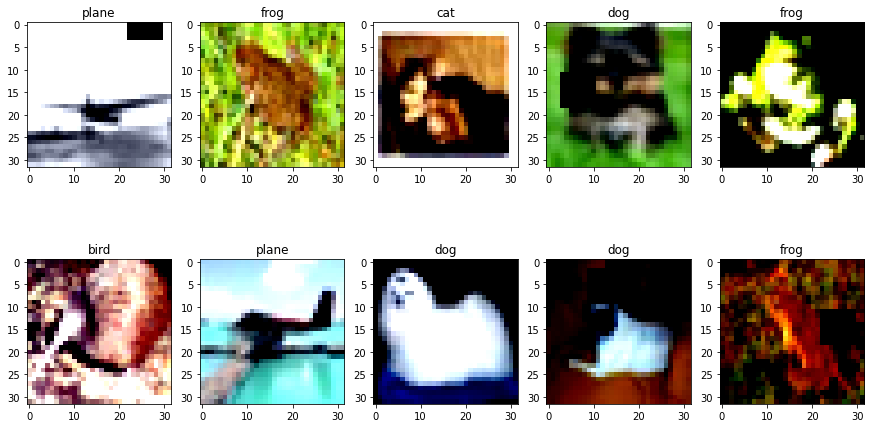

In [82]:
show_images_from_batch.get_images(train_loader)


In [95]:
first_run_RedLR = model.Trial(
    name="first_run_cutout",
    model=net,
    args={
        "epochs": config.EPOCH,
        "train_loader": train_loader,
        "test_loader": test_loader,
        "optimizer": optimizer,
        "device": config.DEVICE,
        "loss_fn": criterion,
        "scheduler": scheduler
    },
)

first_run_RedLR.run()
print("Done!")

  0%|          | 0/391 [00:00<?, ?it/s]

1 / 50
current_lr: 0.0667


  3%|▎         | 2/79 [00:00<00:03, 19.65it/s]

 Training loss = 0.013380608521401882, Training Accuracy : 38.324


  0%|          | 1/391 [00:00<01:09,  5.57it/s]

 Test loss = 1.3042053632736206, Test Accuracy : 51.84
2 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 20.99it/s]

 Training loss = 0.009582316502928734, Training Accuracy : 55.426


  0%|          | 1/391 [00:00<01:12,  5.41it/s]

 Test loss = 1.0762441234588622, Test Accuracy : 61.76
3 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 21.38it/s]

 Training loss = 0.007527054287493229, Training Accuracy : 65.758


  0%|          | 1/391 [00:00<01:09,  5.61it/s]

 Test loss = 0.8644824684143066, Test Accuracy : 70.02
4 / 50
current_lr: 0.0667


  3%|▎         | 2/79 [00:00<00:04, 18.83it/s]

 Training loss = 0.005933139938861132, Training Accuracy : 73.2


  0%|          | 1/391 [00:00<01:10,  5.52it/s]

 Test loss = 0.7127155036926269, Test Accuracy : 75.29
5 / 50
current_lr: 0.0667


  3%|▎         | 2/79 [00:00<00:03, 19.68it/s]

 Training loss = 0.0048831189051270485, Training Accuracy : 78.232


  0%|          | 1/391 [00:00<01:10,  5.54it/s]

 Test loss = 0.6489237806797028, Test Accuracy : 77.34
6 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 21.12it/s]

 Training loss = 0.004103858955204487, Training Accuracy : 81.638


  0%|          | 1/391 [00:00<01:14,  5.21it/s]

 Test loss = 0.5735378924369812, Test Accuracy : 80.44
7 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 21.99it/s]

 Training loss = 0.003590300213545561, Training Accuracy : 83.944


  0%|          | 1/391 [00:00<01:15,  5.17it/s]

 Test loss = 0.5217126008033752, Test Accuracy : 82.31
8 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 21.19it/s]

 Training loss = 0.0031033584382385015, Training Accuracy : 86.096


  0%|          | 1/391 [00:00<01:09,  5.60it/s]

 Test loss = 0.5548152283668518, Test Accuracy : 81.85
9 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 21.79it/s]

 Training loss = 0.002704631071537733, Training Accuracy : 87.872


  0%|          | 1/391 [00:00<01:11,  5.43it/s]

 Test loss = 0.49048503589630127, Test Accuracy : 83.82
10 / 50
current_lr: 0.0667


  3%|▎         | 2/79 [00:00<00:04, 18.74it/s]

 Training loss = 0.002369566820561886, Training Accuracy : 89.416


  0%|          | 1/391 [00:00<01:13,  5.34it/s]

 Test loss = 0.5047559954643249, Test Accuracy : 83.62
11 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 22.28it/s]

 Training loss = 0.0020749110262840986, Training Accuracy : 90.836


  0%|          | 1/391 [00:00<01:13,  5.33it/s]

 Test loss = 0.48528093862533567, Test Accuracy : 84.87
12 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 21.81it/s]

 Training loss = 0.0018432557117193937, Training Accuracy : 91.566


  0%|          | 1/391 [00:00<01:13,  5.28it/s]

 Test loss = 0.49411337628364566, Test Accuracy : 84.13
13 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 22.25it/s]

 Training loss = 0.001587210688740015, Training Accuracy : 92.914


  0%|          | 1/391 [00:00<01:10,  5.50it/s]

 Test loss = 0.5574495752811431, Test Accuracy : 83.34
14 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 21.45it/s]

 Training loss = 0.001390370656736195, Training Accuracy : 93.714


  0%|          | 1/391 [00:00<01:09,  5.61it/s]

 Test loss = 0.4939750666618347, Test Accuracy : 85.15
15 / 50
current_lr: 0.0667


  4%|▍         | 3/79 [00:00<00:03, 22.68it/s]

 Training loss = 0.0012259711511433125, Training Accuracy : 94.528


  0%|          | 1/391 [00:00<01:10,  5.50it/s]

 Test loss = 0.49960496015548705, Test Accuracy : 85.52
16 / 50
current_lr: 0.03335


  4%|▍         | 3/79 [00:00<00:03, 22.65it/s]

 Training loss = 0.0006565513322129846, Training Accuracy : 97.13


  0%|          | 1/391 [00:00<01:12,  5.39it/s]

 Test loss = 0.4805059120178223, Test Accuracy : 87.38
17 / 50
current_lr: 0.03335


  4%|▍         | 3/79 [00:00<00:03, 22.86it/s]

 Training loss = 0.0004922266234643757, Training Accuracy : 97.892


  0%|          | 1/391 [00:00<01:10,  5.54it/s]

 Test loss = 0.4981685475349426, Test Accuracy : 87.46
18 / 50
current_lr: 0.03335


  3%|▎         | 2/79 [00:00<00:04, 18.22it/s]

 Training loss = 0.00042245115037076175, Training Accuracy : 98.204


  0%|          | 1/391 [00:00<01:12,  5.36it/s]

 Test loss = 0.5225722644805908, Test Accuracy : 87.52
19 / 50
current_lr: 0.03335


  4%|▍         | 3/79 [00:00<00:03, 21.34it/s]

 Training loss = 0.00035745895002037287, Training Accuracy : 98.412


  0%|          | 1/391 [00:00<01:10,  5.55it/s]

 Test loss = 0.5402664310455322, Test Accuracy : 87.45
20 / 50
current_lr: 0.03335


  4%|▍         | 3/79 [00:00<00:03, 22.25it/s]

 Training loss = 0.00034087305539287627, Training Accuracy : 98.502


  0%|          | 1/391 [00:00<01:11,  5.46it/s]

 Test loss = 0.5424804964065552, Test Accuracy : 87.37
21 / 50
current_lr: 0.016675


  4%|▍         | 3/79 [00:00<00:03, 22.23it/s]

 Training loss = 0.0002124002348864451, Training Accuracy : 99.122


  0%|          | 1/391 [00:00<01:11,  5.46it/s]

 Test loss = 0.5154050147056579, Test Accuracy : 88.49
22 / 50
current_lr: 0.016675


  4%|▍         | 3/79 [00:00<00:03, 22.11it/s]

 Training loss = 0.0001533770264359191, Training Accuracy : 99.368


  0%|          | 1/391 [00:00<01:10,  5.56it/s]

 Test loss = 0.5276888487815857, Test Accuracy : 88.62
23 / 50
current_lr: 0.016675


  4%|▍         | 3/79 [00:00<00:03, 22.46it/s]

 Training loss = 0.00013217830564826727, Training Accuracy : 99.416


  0%|          | 1/391 [00:00<01:11,  5.43it/s]

 Test loss = 0.5411599106788635, Test Accuracy : 88.73
24 / 50
current_lr: 0.016675


  4%|▍         | 3/79 [00:00<00:03, 22.68it/s]

 Training loss = 0.00011704775533871725, Training Accuracy : 99.534


  0%|          | 1/391 [00:00<01:09,  5.57it/s]

 Test loss = 0.5374336589813232, Test Accuracy : 88.72
25 / 50
current_lr: 0.0083375


  4%|▍         | 3/79 [00:00<00:03, 22.90it/s]

 Training loss = 9.012299415189773e-05, Training Accuracy : 99.644


  0%|          | 1/391 [00:00<01:11,  5.48it/s]

 Test loss = 0.5259313934326172, Test Accuracy : 88.98
26 / 50
current_lr: 0.0083375


  4%|▍         | 3/79 [00:00<00:03, 21.31it/s]

 Training loss = 8.373169839615002e-05, Training Accuracy : 99.662


  0%|          | 1/391 [00:00<01:13,  5.33it/s]

 Test loss = 0.5314468754768371, Test Accuracy : 88.81
27 / 50
current_lr: 0.0083375


  4%|▍         | 3/79 [00:00<00:03, 22.75it/s]

 Training loss = 8.130830246955156e-05, Training Accuracy : 99.698


  0%|          | 1/391 [00:00<01:11,  5.45it/s]

 Test loss = 0.539876668548584, Test Accuracy : 88.86
28 / 50
current_lr: 0.0083375


  4%|▍         | 3/79 [00:00<00:03, 22.65it/s]

 Training loss = 7.256757089635357e-05, Training Accuracy : 99.72


  0%|          | 1/391 [00:00<01:13,  5.31it/s]

 Test loss = 0.5385694831848145, Test Accuracy : 88.91
29 / 50
current_lr: 0.00416875


  4%|▍         | 3/79 [00:00<00:03, 22.51it/s]

 Training loss = 6.520334864035249e-05, Training Accuracy : 99.756


  0%|          | 1/391 [00:00<01:16,  5.13it/s]

 Test loss = 0.5337883831977844, Test Accuracy : 88.98
30 / 50
current_lr: 0.00416875


  4%|▍         | 3/79 [00:00<00:03, 22.62it/s]

 Training loss = 6.447740452131256e-05, Training Accuracy : 99.77


  0%|          | 1/391 [00:00<01:12,  5.40it/s]

 Test loss = 0.5400516890525818, Test Accuracy : 89.11
31 / 50
current_lr: 0.00416875


  4%|▍         | 3/79 [00:00<00:03, 22.20it/s]

 Training loss = 6.04143351665698e-05, Training Accuracy : 99.774


  0%|          | 1/391 [00:00<01:11,  5.45it/s]

 Test loss = 0.5404373169898987, Test Accuracy : 89.04
32 / 50
current_lr: 0.00416875


  3%|▎         | 2/79 [00:00<00:03, 19.53it/s]

 Training loss = 5.8436555264052004e-05, Training Accuracy : 99.794


  0%|          | 1/391 [00:00<01:14,  5.23it/s]

 Test loss = 0.5437266487121583, Test Accuracy : 89.04
33 / 50
current_lr: 0.002084375


  4%|▍         | 3/79 [00:00<00:03, 22.02it/s]

 Training loss = 6.320046668406576e-05, Training Accuracy : 99.754


  0%|          | 1/391 [00:00<01:10,  5.53it/s]

 Test loss = 0.5361779393196106, Test Accuracy : 88.98
34 / 50
current_lr: 0.002084375


  4%|▍         | 3/79 [00:00<00:03, 22.95it/s]

 Training loss = 5.398816938395612e-05, Training Accuracy : 99.806


  0%|          | 1/391 [00:00<01:10,  5.52it/s]

 Test loss = 0.5394340559005737, Test Accuracy : 89.06
35 / 50
current_lr: 0.002084375


  4%|▍         | 3/79 [00:00<00:03, 21.86it/s]

 Training loss = 5.540389975067228e-05, Training Accuracy : 99.754


  0%|          | 1/391 [00:00<01:10,  5.52it/s]

 Test loss = 0.5362466848373413, Test Accuracy : 88.94
36 / 50
current_lr: 0.002084375


  3%|▎         | 2/79 [00:00<00:04, 18.49it/s]

 Training loss = 4.842672569793649e-05, Training Accuracy : 99.824


  0%|          | 1/391 [00:00<01:11,  5.46it/s]

 Test loss = 0.5456837921142578, Test Accuracy : 89.0
37 / 50
current_lr: 0.0010421875


  4%|▍         | 3/79 [00:00<00:03, 22.70it/s]

 Training loss = 5.106564276502468e-05, Training Accuracy : 99.83


  0%|          | 1/391 [00:00<01:09,  5.65it/s]

 Test loss = 0.5395910432815552, Test Accuracy : 88.99
38 / 50
current_lr: 0.0010421875


  4%|▍         | 3/79 [00:00<00:03, 21.32it/s]

 Training loss = 4.637698657461442e-05, Training Accuracy : 99.818


  0%|          | 1/391 [00:00<01:08,  5.68it/s]

 Test loss = 0.540130194568634, Test Accuracy : 89.04
39 / 50
current_lr: 0.0010421875


  4%|▍         | 3/79 [00:00<00:03, 22.73it/s]

 Training loss = 4.265082679921761e-05, Training Accuracy : 99.834


  0%|          | 1/391 [00:00<01:09,  5.62it/s]

 Test loss = 0.5381493488311767, Test Accuracy : 89.09
40 / 50
current_lr: 0.0010421875


  4%|▍         | 3/79 [00:00<00:03, 22.49it/s]

 Training loss = 5.008041625842452e-05, Training Accuracy : 99.812


  0%|          | 1/391 [00:00<01:09,  5.64it/s]

 Test loss = 0.5397305931091309, Test Accuracy : 89.13
41 / 50
current_lr: 0.00052109375


  4%|▍         | 3/79 [00:00<00:03, 22.36it/s]

 Training loss = 5.068706377642229e-05, Training Accuracy : 99.782


  0%|          | 1/391 [00:00<01:15,  5.18it/s]

 Test loss = 0.5391956090927124, Test Accuracy : 88.98
42 / 50
current_lr: 0.00052109375


  4%|▍         | 3/79 [00:00<00:03, 21.67it/s]

 Training loss = 4.806395008927211e-05, Training Accuracy : 99.808


  0%|          | 1/391 [00:00<01:13,  5.31it/s]

 Test loss = 0.5376311203956604, Test Accuracy : 89.03
43 / 50
current_lr: 0.00052109375


  4%|▍         | 3/79 [00:00<00:03, 21.26it/s]

 Training loss = 4.737815834232606e-05, Training Accuracy : 99.82


  0%|          | 1/391 [00:00<01:13,  5.33it/s]

 Test loss = 0.53791656665802, Test Accuracy : 89.1
44 / 50
current_lr: 0.00052109375


  4%|▍         | 3/79 [00:00<00:03, 23.20it/s]

 Training loss = 3.9877977542346343e-05, Training Accuracy : 99.848


  0%|          | 1/391 [00:00<01:09,  5.58it/s]

 Test loss = 0.5379021639823913, Test Accuracy : 89.02
45 / 50
current_lr: 0.000260546875


  4%|▍         | 3/79 [00:00<00:03, 23.30it/s]

 Training loss = 5.1660474127857015e-05, Training Accuracy : 99.802


  0%|          | 1/391 [00:00<01:12,  5.38it/s]

 Test loss = 0.5358548897743225, Test Accuracy : 89.17
46 / 50
current_lr: 0.000260546875


  4%|▍         | 3/79 [00:00<00:03, 22.06it/s]

 Training loss = 4.512929808697663e-05, Training Accuracy : 99.82


  0%|          | 1/391 [00:00<01:11,  5.48it/s]

 Test loss = 0.5397128462791443, Test Accuracy : 89.09
47 / 50
current_lr: 0.000260546875


  4%|▍         | 3/79 [00:00<00:03, 21.35it/s]

 Training loss = 4.611999975168146e-05, Training Accuracy : 99.832


  0%|          | 1/391 [00:00<01:11,  5.46it/s]

 Test loss = 0.5390071928977966, Test Accuracy : 89.08
48 / 50
current_lr: 0.000260546875


  4%|▍         | 3/79 [00:00<00:03, 23.05it/s]

 Training loss = 4.654733493225649e-05, Training Accuracy : 99.828


  0%|          | 1/391 [00:00<01:09,  5.57it/s]

 Test loss = 0.5364054035186767, Test Accuracy : 89.12
49 / 50
current_lr: 0.0001302734375


  4%|▍         | 3/79 [00:00<00:03, 21.48it/s]

 Training loss = 5.058495298726484e-05, Training Accuracy : 99.798


  0%|          | 1/391 [00:00<01:08,  5.66it/s]

 Test loss = 0.5375820281982422, Test Accuracy : 89.07
50 / 50
current_lr: 0.0001302734375


  4%|▍         | 3/79 [00:00<00:03, 23.34it/s]

 Training loss = 4.3794145312858745e-05, Training Accuracy : 99.836


100%|██████████| 79/79 [00:03<00:00, 21.85it/s]

 Test loss = 0.5350791157722473, Test Accuracy : 89.17
Done!


100%|██████████| 79/79 [00:03<00:00, 20.00it/s]


plot saved at ./images/correctly_classified_images.png


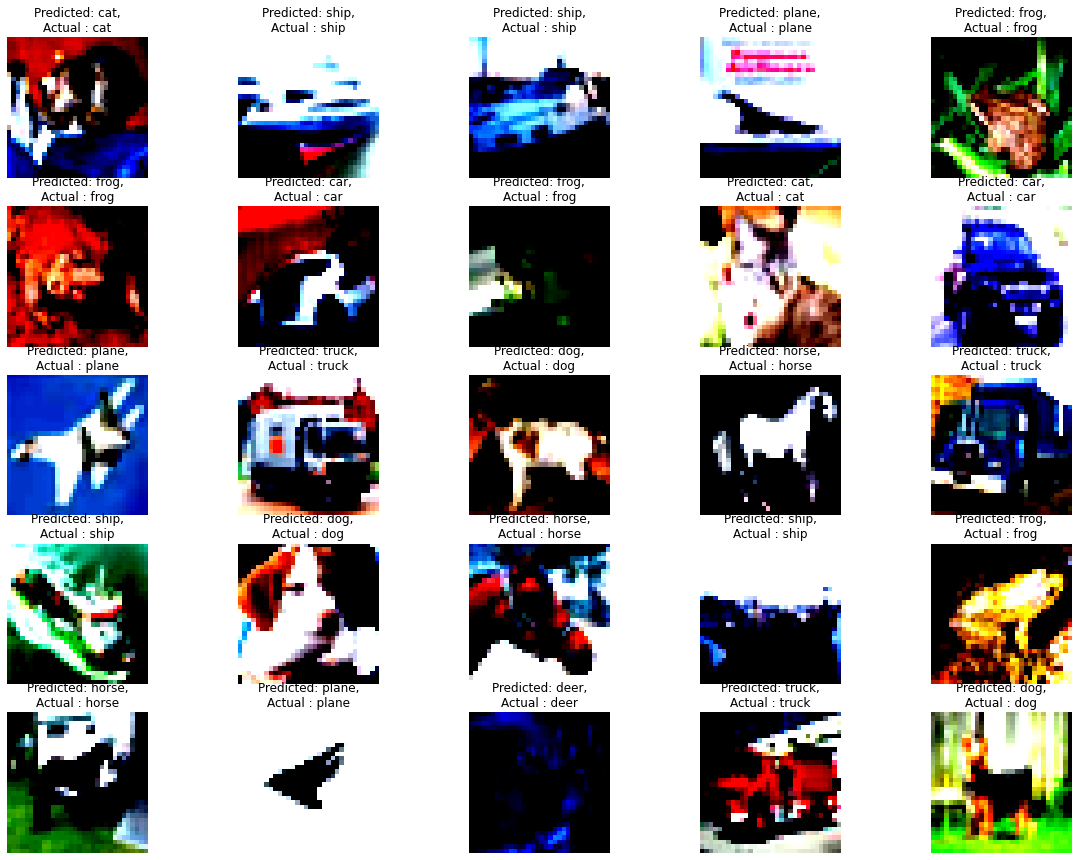

In [101]:
show_images_from_batch.plot_images_by_classification(25, first_run_RedLR.model, test_loader, config.DEVICE, misclassified=False)


100%|██████████| 79/79 [00:03<00:00, 21.95it/s]


plot saved at ./images/misclassified_images.png


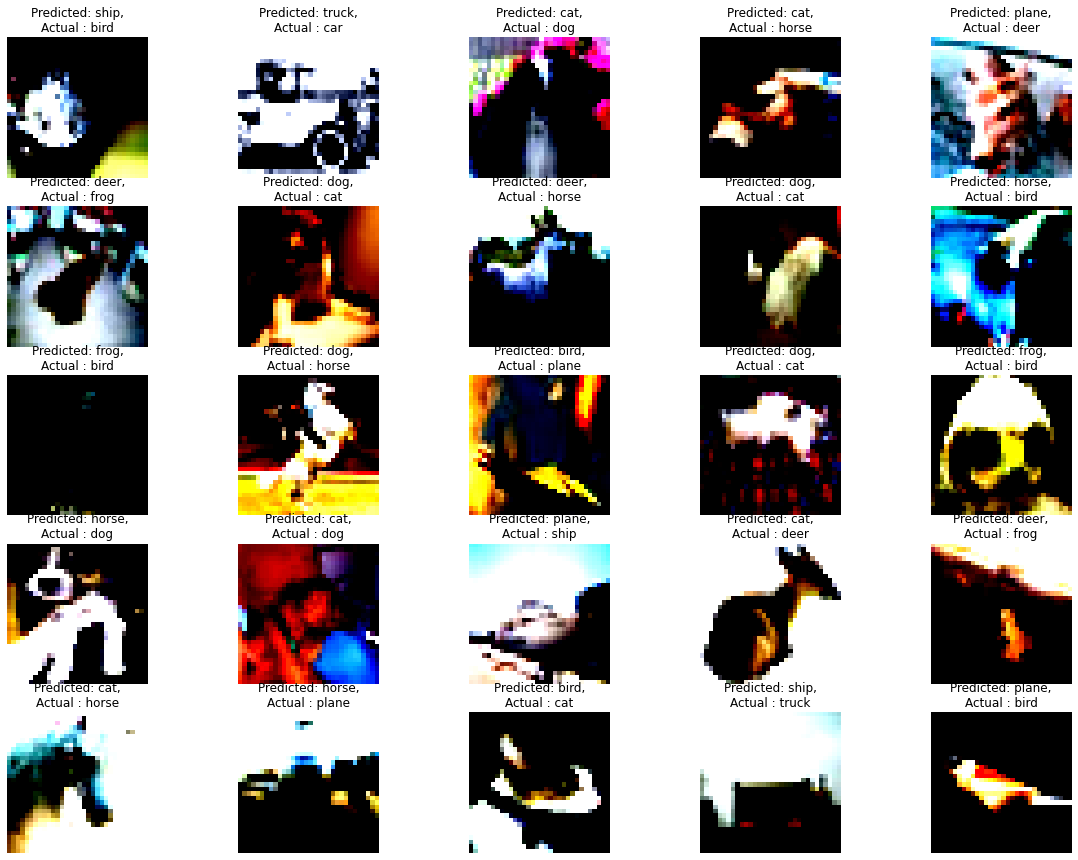

In [102]:
show_images_from_batch.plot_images_by_classification(25, first_run_RedLR.model, test_loader, config.DEVICE)


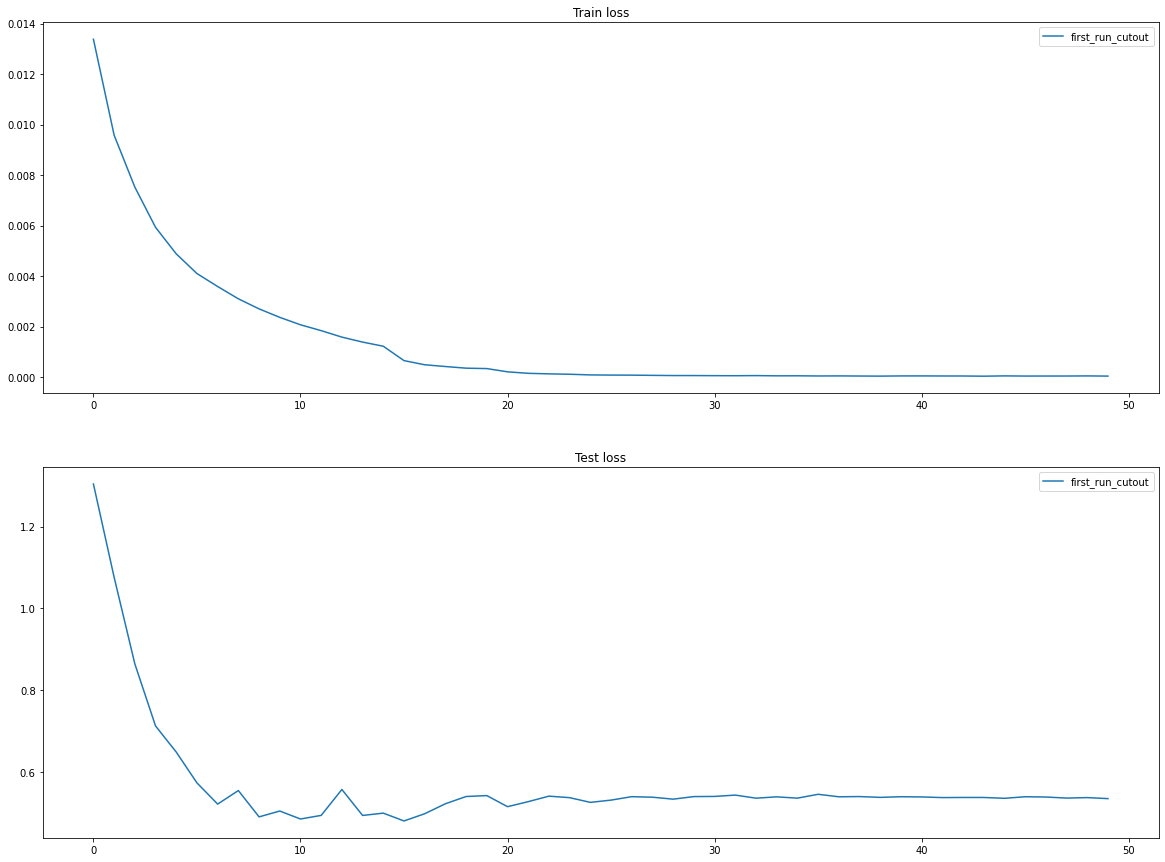

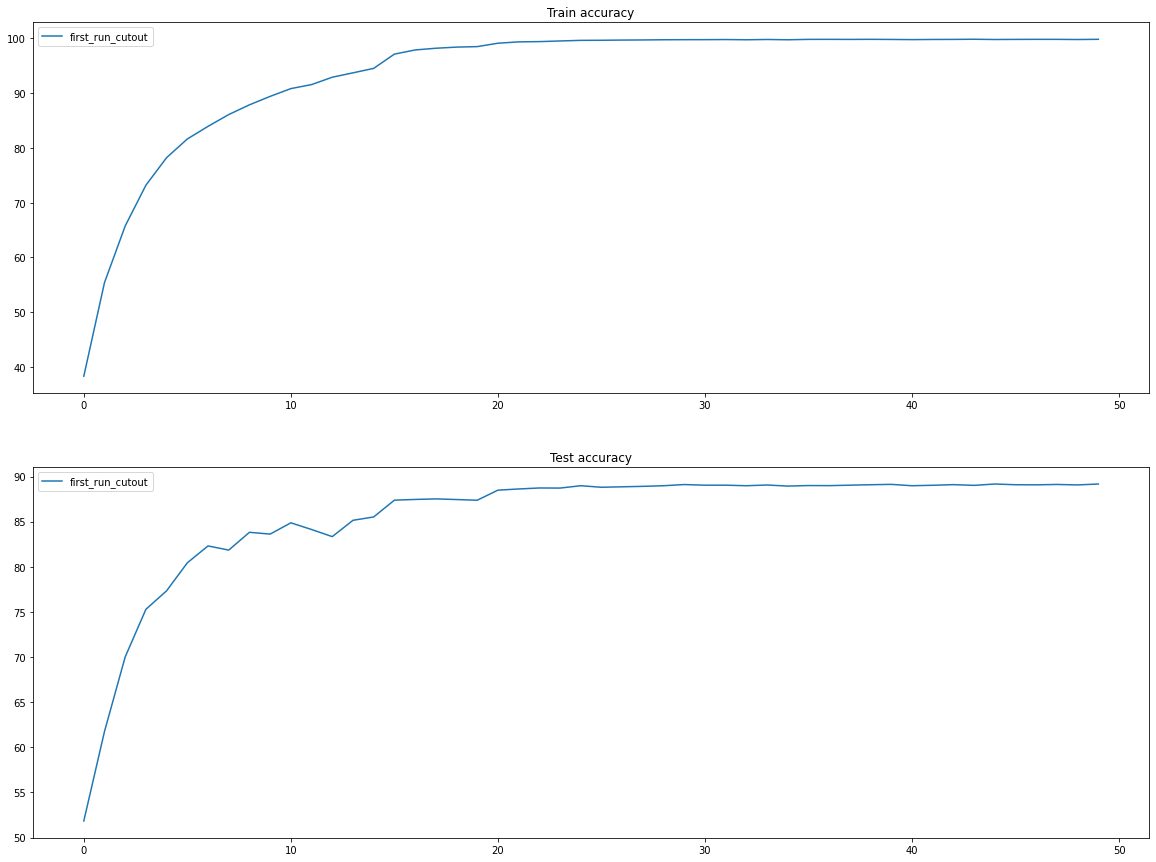

In [103]:
show_images_from_batch.plot_curves_for_trials(first_run_RedLR)


**GRAD-CAM**

GRAD CAM for correctly classified images :- 

100%|██████████| 79/79 [00:03<00:00, 21.30it/s]


plot saved at ./images/correctly_classified_images_cam.png


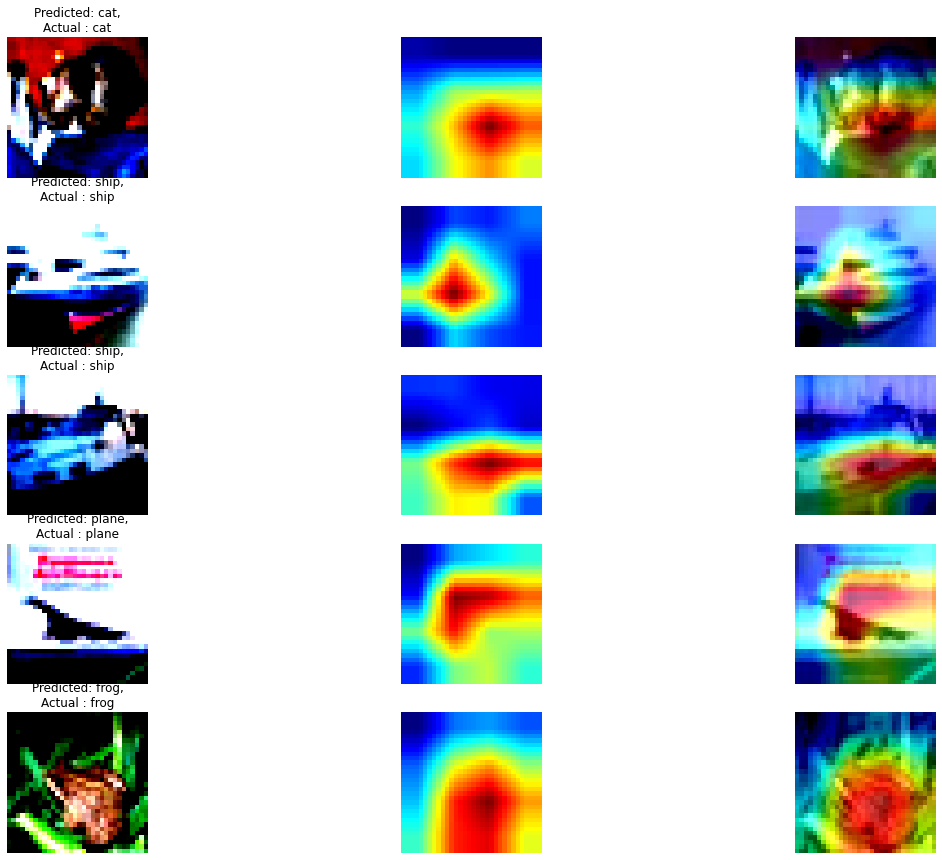

In [104]:
grad_cam.plot_grad_cam(number=5, model=first_run_RedLR.model,test_loader=test_loader, device=config.DEVICE, misclassified=False)


GRAD CAM for incorrectly classified images :- 

100%|██████████| 79/79 [00:03<00:00, 21.47it/s]


plot saved at ./images/misclassified_images_cam_25_images.png


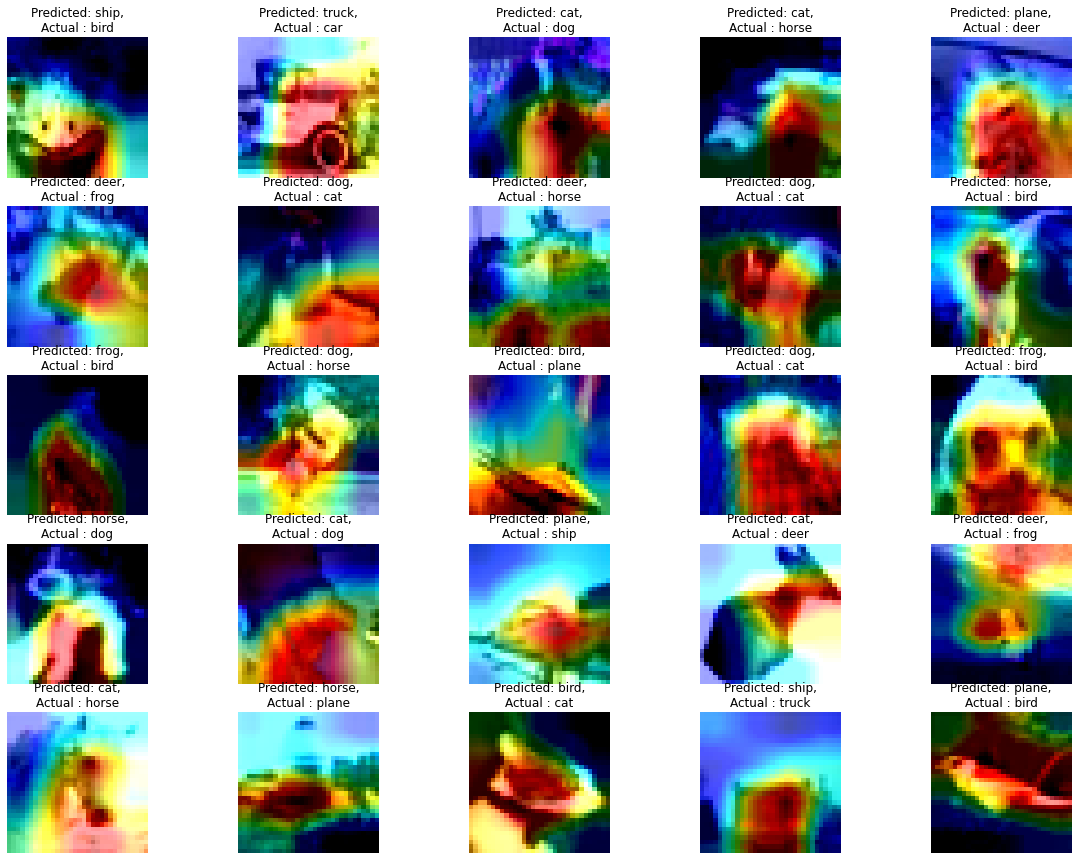

In [149]:
grad_cam.modified_plot_grad_cam(number=25, model=first_run_RedLR.model,test_loader=test_loader, device=config.DEVICE, misclassified=True)
